# What insights can we get from our ticket service data?

A Director managing the team that responds to incoming tickets from our customers asked me what insights we are able to get from our ticket service data. I successfully migrated our ticketing system from Freshdesk to our CRM, Hubspot in June 2020.

Our customers are able to raise tickets with us through our platform to ask questions and/or reach out for support when they need help. An effective ticketing system is important to us for a number of reasons: 

- to increase communication with our customers, 
- support our customers with queries to drive engagement
- report on our response times and measure KPIs
- manage and priortise incoming requests

In this project I explore the data we have been collecting from Hubspot for the first time to give insights into ticket volumes and team ownership, which customers are raising tickets and on which common topics. We want the analysis to help us in firstly understanding more about the above, but also enable us to proactively consider common questions in the design of our platform to aid user experience, and manage the internal workload by looking at ticket volumes and customers sending in the most tickets.


Please note that all data has been anonymised.

# 1. Import Libaries

Below we are importing all the Python libraries we will need for this project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.options.mode.chained_assignment = None 

# 2. Import Data

Here we are importing 2 datasets:

In [2]:
number = pd.read_csv('~/Documents/portfolio/datasets/number of tickets.csv')
print(number)

         Date  All  Data Team
0  Jun - 2020  796        750
1  Jul - 2020  746        561
2  Aug - 2020  539        414
3  Sep - 2020  744        527
4  Oct - 2020  621        465
5  Nov - 2020  566        433
6  Dec - 2020  465        360


The first dataset shows the number of tickets we received each month for 7 months. 

<br>

To give a description of the columns: 

<b>Date</b> : The month in which the ticket was received.

<b>All</b> : The total number of tickets received.

<b>Data Team</b> : The number of tickets that our data team handled.

In [3]:
tickets = pd.read_csv('~/Documents/portfolio/datasets/ticket analysis for python anon.csv')

In [4]:
tickets.head()

,Ticket ID,Ticket name,Ticket status,Create date,Ticket owner,Source,Category,Company ID,Amount,Customer Type,Duration being a customer (years),Status
0,3873,ERZ,Closed,07/12/2020,Rob,Web,Page Adding,2530840286,2326,One,2,Customer
1,3874,ESA,Closed,06/12/2020,Rob,Web,Page Adding,2530840286,2326,One,2,Customer
2,3875,ESB,Closed,06/12/2020,Rob,Web,Page Adding,2530840286,2326,One,2,Customer
3,3876,ESC,Closed,17/11/2020,Tony,Web,Page Update,2530840286,2326,One,2,Customer
4,3877,ESD,Closed,17/11/2020,Tony,Web,Page Update,2530840286,2326,One,2,Customer


The second dataset shows every tickets we received in 7 months. 

<br>

To give a description of the columns: 

<b>Ticket ID</b> : The unique identifier for each ticket.

<b>Ticket Name</b> : Name of ticket.

<b>Ticket Status</b> : Whether the ticket is open or closed.
    
<b>Create Date</b> : The date the client raised the ticket.
    
<b>Ticket Owner</b> : The internal employee handling the ticket.
    
<b>Source</b> : Whether the ticket was raised through our platform or by email.

<b>Category</b> : A grouping depending on the type of query given by the ticket owner. 
    
<b>Company ID</b> : The unique identifier for each client.
    
<b>Amount</b> : The amount of the client's subscription.
    
<b>Customer Type</b> : we categorise into three pots of client according to size in revenue; one being the smallest, and three being the largest.
    
<b>Duration being a customer (years)</b> : the year of maturity of the account.
    
<b>Status</b> : Whether the ticket was raised by a client or a prospect client on trial.

# 3. Data Analysis

In this section we will clean and explore the initial datasets.

3a. Cleaning Dataset One

In [43]:
number.shape # This is a small dataset of 7 rows and 3 columns

(7, 3)

In [44]:
number.dtypes # types of data

Date         object
All           int64
Data Team     int64
dtype: object

In [45]:
# Overwriting the original `Date` column with one that's been converted to a datetime series

number['Date'] = pd.to_datetime(number['Date']).dt.strftime('%B, %Y') 

In [46]:
number.dtypes

Date         object
All           int64
Data Team     int64
dtype: object

In [47]:
# making the 'Date' column the index of the DataFrame.

number.set_index('Date', inplace = True) 
number

,All,Data Team
Date,,
"June, 2020",796,750
"July, 2020",746,561
"August, 2020",539,414
"September, 2020",744,527
"October, 2020",621,465
"November, 2020",566,433
"December, 2020",465,360


3b. Exploring Dataset One

In [48]:
print('The average number of tickets we receive on a monthly basis is ' + str(round(number['All'].mean())) +'.')

The average number of tickets we receive on a monthly basis is 640.


In [49]:
# Creating a column to show the percentage of tickets handled by the data team on a monthly basis

number['% of tickets to data team'] = round((number['Data Team']/number['All'])*100,0).astype(int)
number['% of tickets to data team']

Date
June, 2020         94
July, 2020         75
August, 2020       77
September, 2020    71
October, 2020      75
November, 2020     77
December, 2020     77
Name: % of tickets to data team, dtype: int64

In [50]:
print('The average percentage of tickets our data team handle on a monthly basis is ' + 
      str(round(number['% of tickets to data team'].mean())) +'%.')

The average percentage of tickets our data team handle on a monthly basis is 78%.


In [51]:
# Calculating the number of tickets that are handled by other teams at our company and adding this to the dataframe
# For completeness, adding a column to calculate the percentage of tickets handles by other teams

number['Number of tickets to remaining teams']=number['All'] - number['Data Team'] 
number['% of tickets to remaining teams'] = round(100 - number['% of tickets to data team'],0).astype(int)

In [52]:
# renaming columns to make clear

number.rename(columns= {'Data Team':'Number of tickets to data team','All':'Total number of tickets'}, 
              inplace = True)

number

,Total number of tickets,Number of tickets to data team,% of tickets to data team,Number of tickets to remaining teams,% of tickets to remaining teams
Date,,,,,
"June, 2020",796,750,94,46,6
"July, 2020",746,561,75,185,25
"August, 2020",539,414,77,125,23
"September, 2020",744,527,71,217,29
"October, 2020",621,465,75,156,25
"November, 2020",566,433,77,133,23
"December, 2020",465,360,77,105,23


Above we have transformed the dataset into a much clearer read and added columns to give insights straight away.

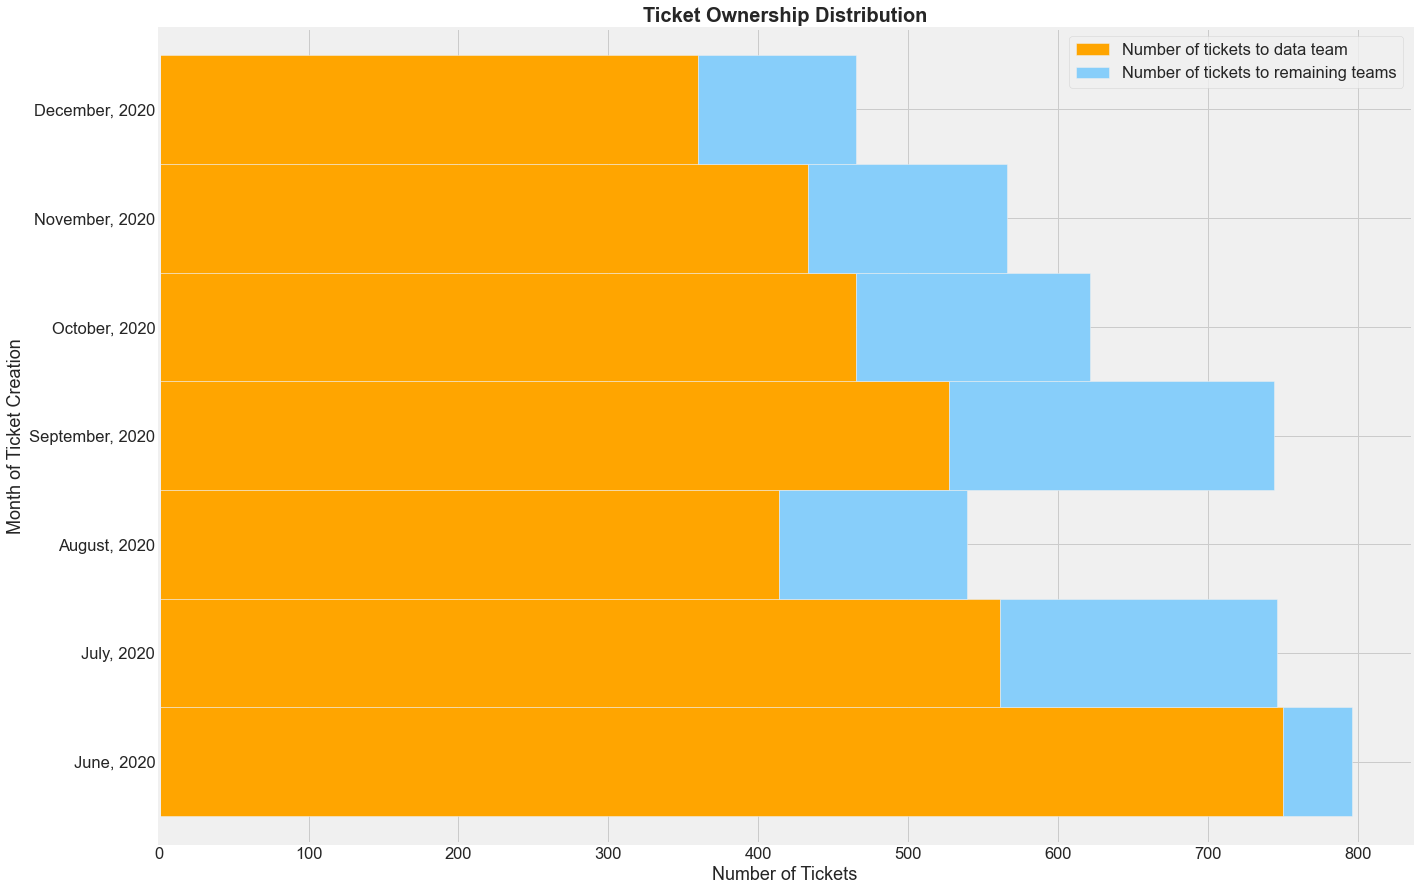

In [53]:
# plotting the distribution of tickets handle by the data team versus the rest of the company in each month.
number.drop(columns=['Total number of tickets','% of tickets to remaining teams','% of tickets to data team'], inplace = True)

ax =number.plot( 
    
    kind = 'barh', 
    stacked = True,  
    width=1.0,
    color = (['orange','lightskyblue']),
    figsize=(20,15))

ax.set_title('Ticket Ownership Distribution', fontsize=20, weight='bold')
ax.set_xlabel('Number of Tickets',fontsize=18)
ax.set_ylabel('Month of Ticket Creation',fontsize=18);

We can see that the data team handle the majority of all tickets each month.

3c. Cleaning Dataset Two

In [54]:
tickets.shape # this dataset is 4017 rows and 12 columns

(4017, 12)

In [55]:
tickets.dtypes # types of data

Ticket ID                             int64
Ticket name                          object
Ticket status                        object
Create date                          object
Ticket owner                         object
Source                               object
Category                             object
Company ID                            int64
Amount                                int64
Customer Type                        object
Duration being a customer (years)     int64
Status                               object
dtype: object

In [56]:
# renaming column name

tickets.rename(columns= {'Create date':'Date'}, 
              inplace = True)

In [57]:
# overwriting the original `Date` column with one that's been converted to a datetime series

tickets['Date'] = pd.to_datetime(tickets['Date']).dt.strftime('%d-%b-%Y') 

In [58]:
tickets.dtypes 

Ticket ID                             int64
Ticket name                          object
Ticket status                        object
Date                                 object
Ticket owner                         object
Source                               object
Category                             object
Company ID                            int64
Amount                                int64
Customer Type                        object
Duration being a customer (years)     int64
Status                               object
dtype: object

In [59]:
tickets.isnull().sum() # checking for null values

Ticket ID                               0
Ticket name                             1
Ticket status                           0
Date                                    0
Ticket owner                            0
Source                                  0
Category                             1629
Company ID                              0
Amount                                  0
Customer Type                           0
Duration being a customer (years)       0
Status                                  0
dtype: int64

In [60]:
tickets[tickets['Ticket name'].isnull()].any(axis=1) # locating the row with the null value

4014    True
dtype: bool

In [61]:
tickets.loc[4014] # The ticket name here is showing as NaN because of the anonmisation 

Ticket ID                                    364
Ticket name                                  NaN
Ticket status                             Closed
Date                                 28-Apr-2020
Ticket owner                                Bill
Source                                     Email
Category                                     NaN
Company ID                            1118746484
Amount                                      2328
Customer Type                                One
Duration being a customer (years)              2
Status                                  Customer
Name: 4014, dtype: object

In [62]:
tickets['Ticket name'].fillna('NAB', inplace = True) # changing the ticket name

In [63]:
tickets.isnull().sum() # checking the null value is gone

Ticket ID                               0
Ticket name                             0
Ticket status                           0
Date                                    0
Ticket owner                            0
Source                                  0
Category                             1629
Company ID                              0
Amount                                  0
Customer Type                           0
Duration being a customer (years)       0
Status                                  0
dtype: int64

In [64]:
 # checking there are no duplications in the ticket name

duplicateRowsDF = tickets[tickets.duplicated(['Ticket name'])]

print(duplicateRowsDF)

Empty DataFrame
Columns: [Ticket ID, Ticket name, Ticket status, Date, Ticket owner, Source, Category, Company ID, Amount, Customer Type, Duration being a customer (years), Status]
Index: []


In [65]:
tickets['Category'].fillna('Uncategorised', inplace = True) # filling in the null category values

3d. Exploring Dataset Two

Let's focus on the tickets raised by customers.

In [66]:
clients = tickets['Status'] == 'Customer' # saving customer tickets in a new dataframe

In [67]:
tickets[clients].head()

,Ticket ID,Ticket name,Ticket status,Date,Ticket owner,Source,Category,Company ID,Amount,Customer Type,Duration being a customer (years),Status
0,3873,ERZ,Closed,12-Jul-2020,Rob,Web,Page Adding,2530840286,2326,One,2,Customer
1,3874,ESA,Closed,12-Jun-2020,Rob,Web,Page Adding,2530840286,2326,One,2,Customer
2,3875,ESB,Closed,12-Jun-2020,Rob,Web,Page Adding,2530840286,2326,One,2,Customer
3,3876,ESC,Closed,17-Nov-2020,Tony,Web,Page Update,2530840286,2326,One,2,Customer
4,3877,ESD,Closed,17-Nov-2020,Tony,Web,Page Update,2530840286,2326,One,2,Customer


In [68]:
tickets[clients].shape # rows and columns in the client ticket dataframe

(3892, 12)

Let's look at some visualisations.

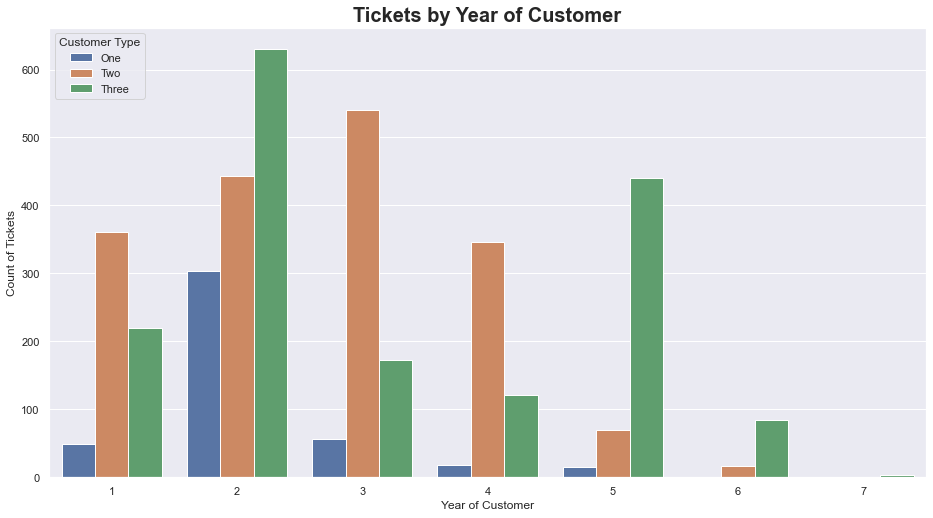

In [70]:
# bar chart to show the number of tickets raised by our clients by their duration of subscription and type of 
# customer.

clients1 = tickets[clients]

clients1.sort_values(('Duration being a customer (years)'))

ax = sns.countplot(x="Duration being a customer (years)", hue="Customer Type", data=clients1)
ax.set_title('Tickets by Year of Customer', fontsize =20, weight = 'bold')
ax.set(xlabel='Year of Customer', ylabel='Count of Tickets')

sns.set(rc={'figure.figsize':(18,8)})

In [71]:
# total number of tickets raised per duration of customer

tickets[clients]['Duration being a customer (years)'].value_counts() 

2    1378
3     769
1     629
5     525
4     485
6     103
7       3
Name: Duration being a customer (years), dtype: int64

From the graph above we can see that customers in year 2 raise the most tickets, almost double that of the second highest year (year 3). Type two customers show less variation in the amount of support they require than type three across the years. Type 3 customers need more help in years 2 and 5 on their subscription, whereas type two peaks in year 3.

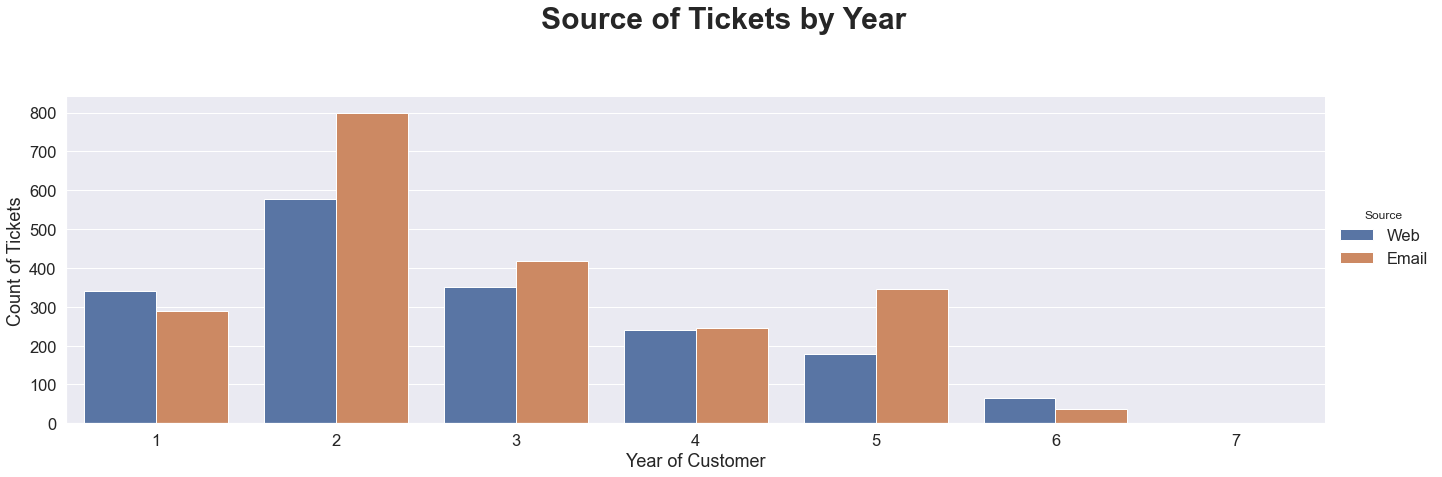

In [72]:
# bar chart to show source of tickets by year of customer

tickets[clients].sort_values(('Duration being a customer (years)'))

sns.set(font_scale=1.5)

g = sns.catplot(x="Duration being a customer (years)", hue="Source", 
                data=tickets[clients], kind="count", orient="h", height=6, aspect=3
                )

g.fig.set_figwidth(20)
g.fig.set_figheight(7)

(g.set_axis_labels("Year of Customer", "Count of Tickets"))
    
g.fig.suptitle('Source of Tickets by Year', weight='bold', fontsize=30)

plt.subplots_adjust(top=0.8);

The bar graph above shows that for most years there is not too much variance in our clients preference in raising ticket by web compared to email. It shows that first year clients slightly prefer using the web to raise tickets, however for each year after email is the most popular source (with the exception of year 6).

In [73]:
tickets['Date'] = tickets['Date'].apply(pd.to_datetime,format ='%d-%b-%Y')

In [74]:
tickets.dtypes

Ticket ID                                     int64
Ticket name                                  object
Ticket status                                object
Date                                 datetime64[ns]
Ticket owner                                 object
Source                                       object
Category                                     object
Company ID                                    int64
Amount                                        int64
Customer Type                                object
Duration being a customer (years)             int64
Status                                       object
dtype: object

Let's explore the reasons the tickets are being raised.

In [75]:
# creating a mask to make plotting easier

maskone = tickets[clients].drop(columns=['Ticket ID', 'Ticket status', 'Date',
       'Ticket owner', 'Source', 'Company ID',
       'Amount', 'Customer Type','Status'])

In [76]:
# aggregation steps for plotting

countsone = maskone.groupby(['Duration being a customer (years)', 'Category']).count()
print(countsone)

                                                       Ticket name
Duration being a customer (years) Category                        
1                                 Delivery Error                19
                                  General                       83
                                  Information Request           21
                                  Other                          1
                                  Page Adding                  166
                                  Page Update                   94
                                  Uncategorised                245
2                                 Delivery Error                70
                                  General                      137
                                  Information Request            5
                                  Page Adding                  387
                                  Page Update                  260
                                  Uncategorised               

In [77]:
# aggregation steps for plotting

countsone = countsone.unstack(level=1)
countsone.columns = countsone.columns.droplevel(level=0)
print (countsone)

Category                           Delivery Error  General  \
Duration being a customer (years)                            
1                                            19.0     83.0   
2                                            70.0    137.0   
3                                            28.0     83.0   
4                                             8.0     43.0   
5                                             5.0     60.0   
6                                             4.0      9.0   
7                                             NaN      1.0   

Category                           Information Request  Other  Page Adding  \
Duration being a customer (years)                                            
1                                                 21.0    1.0        166.0   
2                                                  5.0    NaN        387.0   
3                                                 19.0    NaN        163.0   
4                                                  

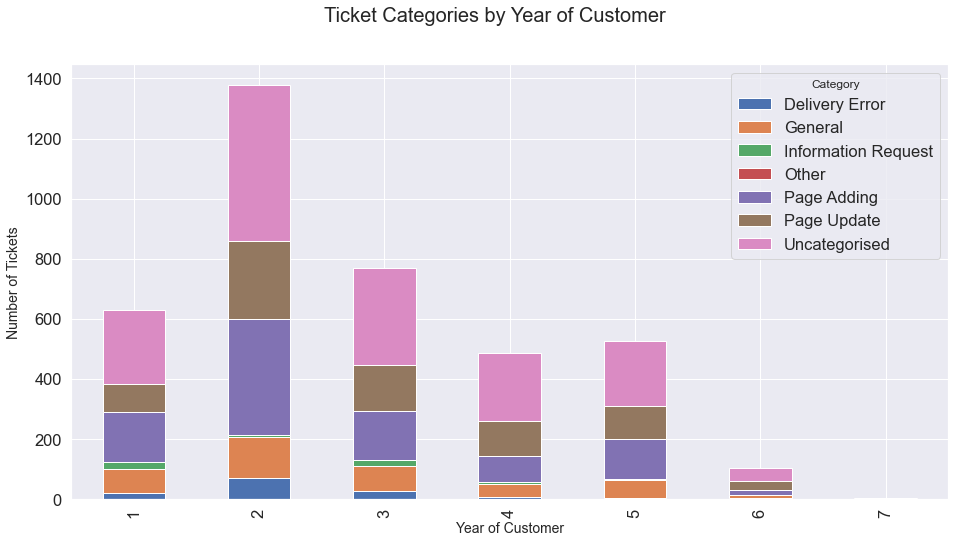

In [78]:
# stacked bar graph to show ticket categories by year of customer

countsone.plot(kind ='bar', stacked = True, figsize = (14,8));
plt.xlabel('Year of Customer', fontsize = 14);
plt.ylabel('Number of Tickets', fontsize = 14);
plt.suptitle('Ticket Categories by Year of Customer', fontsize=20);  

The above shows us that whilst nearly half of the tickets have been uncategorised we can still gauage insights from those that have been. Page adding and updating are the most popular reasons for a customer to raise a ticket. Information requests and other receive very little enquiries and delivery error issues are also low, which is a positive. General tickets receive a fairly consistent level of traffic in customers irrespective of the duration they have been a customer. 

In [79]:
# calculating the number of clients that have sent in tickets

clients_sent_tickets = tickets[clients].groupby('Customer Type')['Company ID'].nunique().sum()
clients_sent_tickets 

445

In [80]:
# looking at the breakdown of customer type

df1 = tickets[clients].groupby('Customer Type')['Company ID'].nunique()
df1

Customer Type
One       44
Three    198
Two      203
Name: Company ID, dtype: int64

With 1,100 clients, we can calculate that only 40% of our clients raise tickets for support. This doesn't mean the remaining 60% do not ask for support, they may call or email their account managers on issues of 'how to' that do not require a ticket. 

Our customer types are categorised by size in terms of revenue, therefore type three customers pay more for the subscription than type ones. Middle sized companies raise the most tickets, then the largest ones and small.

Let's have a look at the number of tickets each client is raising.

In [81]:
# creating a mask to make plotting easier

maskthree = tickets[clients].drop(columns=['Ticket ID', 'Ticket status', 'Date',
       'Ticket owner', 'Source','Category', 'Duration being a customer (years)','Status'])

In [82]:
# aggregation by 'Company ID' to get the number of tickets raised per customer

countsthree = maskthree.groupby(['Company ID','Customer Type','Amount']).count()
print(countsthree)

                                 Ticket name
Company ID Customer Type Amount             
918925012  Two           5876              2
918925579  Three         12029             6
918925594  Two           14125             9
918925600  Two           7345              2
918925603  Two           5763              2
918925608  Three         6554             11
918925612  Two           3435              3
918925674  Two           5763              2
918925725  Two           9081              3
918925730  Three         8814              1
918925776  Two           7492              5
918925788  Two           5820             15
918925818  Two           5085              2
918925821  Three         2882             25
918925824  Three         5763              8
918925846  Two           5085              1
918925858  Two           5594              1
918925877  Two           5368              1
918925922  Two           5368              2
918925923  Two           5848              1
918925969 

In [154]:
countsthree.rename(columns = {'Ticket name' : 'Total Number of Tickets'}, inplace = True)

In [155]:
countsthree.columns

Index(['Total Number of Tickets'], dtype='object')

In [156]:
# sorting dataframe by the customer with the highest number of tickets

countsthree.sort_values(('Total Number of Tickets'), ascending=False, inplace = True)
countsthree

,,,Total Number of Tickets
Company ID,Customer Type,Amount,
1118746484,One,2328,174
919062132,Two,4464,139
943377131,Three,22594,139
1154746336,Three,10114,137
919061212,Three,8794,124
2493214211,Two,5085,108
943377309,Two,5505,82
2530837179,Three,7345,72
1154746337,One,1746,70


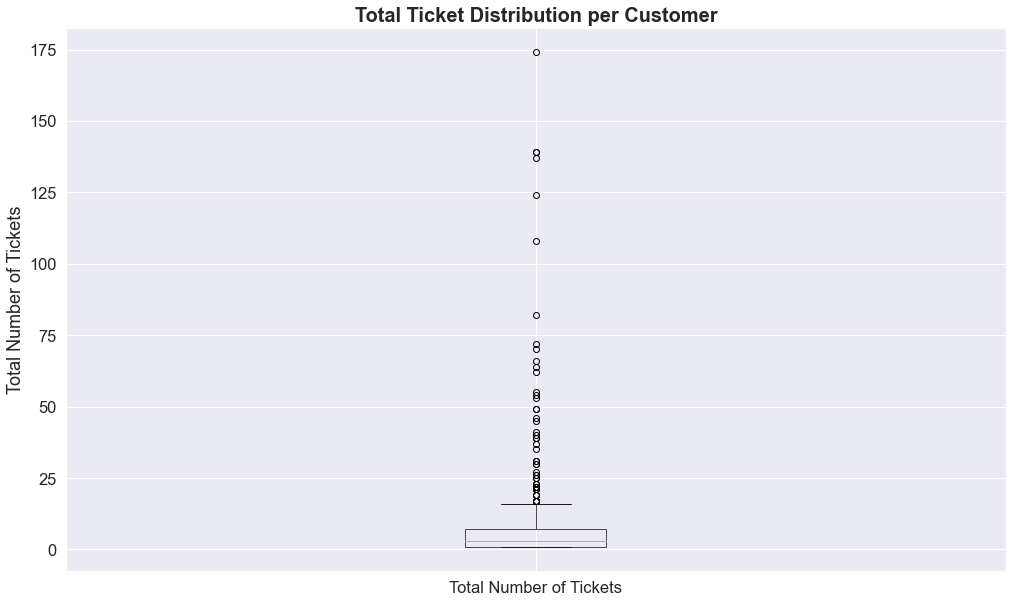

In [157]:
# visualising the distribution of total tickets per customer

a = countsthree.boxplot(column='Total Number of Tickets',figsize=(15,10))

a.set_title('Total Ticket Distribution per Customer', fontsize=20, weight='bold')
a.set_ylabel('Total Number of Tickets',fontsize=18);


In [158]:
countsthree.describe()

,Total Number of Tickets
count,447.000000
mean,8.706935
std,19.003222
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,174.000000


Looking at the descriptive statistics we can see the average number of tickets clients send in for the time period is 9. The higher standard deviation tells us the data is less concentrated around this mean. The 75% quartile being only 7 and the maximum being 174 also supports this. The boxplot gives us a better visual of the spread of the data and shows us there are a number of clients who send an above average number of tickets in. Lets identify these clients.

In [159]:
# number of clients that have sent an above average number of tickets

above_average = countsthree['Total Number of Tickets'] > 9
above_average.value_counts()

False    358
True      89
Name: Total Number of Tickets, dtype: int64

There are 89 clients that sent in more than 9 tickets in the time period.

In [160]:
# looking at the 89 clients that sent an above average number of tickets

Companies_sending_above_average_tickets = countsthree.head(89)
Companies_sending_above_average_tickets

,,,Total Number of Tickets
Company ID,Customer Type,Amount,
1118746484,One,2328,174
919062132,Two,4464,139
943377131,Three,22594,139
1154746336,Three,10114,137
919061212,Three,8794,124
2493214211,Two,5085,108
943377309,Two,5505,82
2530837179,Three,7345,72
1154746337,One,1746,70


In [161]:
# calculating the percentage of tickets that are sent by the smaller subset of 89 clients from above.

tickets_above_average = Companies_sending_above_average_tickets['Total Number of Tickets'].sum()
round((tickets_above_average/countsthree['Total Number of Tickets'].sum())*100,0)

74.0

In [162]:
# reseting indexes

Companies_sending_above_average_tickets.reset_index(drop=False, inplace=True)
Companies_sending_above_average_tickets

,Company ID,Customer Type,Amount,Total Number of Tickets
0,1118746484,One,2328,174
1,919062132,Two,4464,139
2,943377131,Three,22594,139
3,1154746336,Three,10114,137
4,919061212,Three,8794,124
5,2493214211,Two,5085,108
6,943377309,Two,5505,82
7,2530837179,Three,7345,72
8,1154746337,One,1746,70
9,1013146722,Two,4520,66


In [163]:
# looking at the breakdown of customer types within the top 89 clients

Companies_sending_above_average_tickets['Customer Type'].value_counts()

Two      44
Three    38
One       7
Name: Customer Type, dtype: int64

Lets look at the 7 customers that are type one, therefore pay the least but send in above average tickets.

In [164]:
ones = Companies_sending_above_average_tickets[Companies_sending_above_average_tickets['Customer Type'] == 'One']
ones

,Company ID,Customer Type,Amount,Total Number of Tickets
0,1118746484,One,2328,174
8,1154746337,One,1746,70
27,1785671619,One,2350,30
31,943377269,One,3390,26
39,2097863530,One,2260,22
75,943214647,One,1918,11
81,942625787,One,2622,11


In [165]:
Companies_sending_above_average_tickets.columns

Index(['Company ID', 'Customer Type', 'Amount', 'Total Number of Tickets'], dtype='object')

We can see from the row numbers that the top customer that has sent in the most tickets (174) in the time period is a type one and pays £2,328 a year. The 8th highest ticket sender that is a type one pays £1,746 sent in 70 tickets.

This seems like a lot of work for our support team for these low value clients, let's add a column to look at amount we receive relative to tickets for each of the top 89 customers.

In [167]:
# creating a new column in the dataframe

Companies_sending_above_average_tickets['Amount per Ticket'] = round(Companies_sending_above_average_tickets['Amount']/Companies_sending_above_average_tickets['Total Number of Tickets'],0)

In [112]:
# sorting the new colmn by lowest amount per ticket

Companies_sending_above_average_tickets.sort_values(('Amount per Ticket'), ascending=True, inplace = True)
Companies_sending_above_average_tickets

,Company ID,Customer Type,Amount,Total Number of Tickets,Amount per Ticket
0,1118746484,One,2328,174,13.0
8,1154746337,One,1746,70,25.0
1,919062132,Two,4464,139,32.0
5,2493214211,Two,5085,108,47.0
6,943377309,Two,5505,82,67.0
9,1013146722,Two,4520,66,68.0
4,919061212,Three,8794,124,71.0
3,1154746336,Three,10114,137,74.0
27,1785671619,One,2350,30,78.0
10,968932684,Three,5396,64,84.0


Customer on row 2 is the second highest for number of tickets sent in, however comparing this to the much higher subscription amount and the amount per ticket shows us they are less of a concern for taking up a lot of our team's time for lower value and are lower down the list. Based on the amount they pay, our team's ticket help is valued at £163 compared to £13 of that of the customer on row 0, whom sends in the most tickets.

# Conclusion and Recommendations

I have shown that 40% of our clients use the ticket function and the average number of tickets we receive on a monthly basis is 640, of which the data team handle around 78%. We receive the most tickets from clients in years 1, 2 and 3 of their subscription and there isn't a clear preference of raising tickets through the platform or via email. 

Page adding and updating are the most popular reasons for a customer to raise a ticket. And general tickets receive a fairly consistent level of traffic in customers irrespective. We could look at these tickets further to determine similar frequently asked questions and look to change the design or add prompts in the platform to help address these. 

The average amount of tickets sent by clients who use the ticket function is 9. And 89 clients sent an above average number of tickets in the time period, which accounted for 74% of all tickets received in the period. I took this one step further and using an using an engineered measurement of amount we receive per ticket, identified to the data team clients we receive low amounts for in comparison to the tickets they send in. This will help them manage their workload, and explore options like looking to manage expectations of response times to clients sending in above average tickets, or limit the amount of tickets to make sure that the amount we receive per ticket doesn't drop below a certain threshold if the efforts of the team would be more valuable else where.
